## 1. Business Understanding

Das Ziel dieses Projekts ist es, Amazon Alexa-Bewertungen zu analysieren, um zu verstehen, ob das Feedback positiv oder negativ ist. Dies hilft Unternehmen, bessere Entscheidungen zu treffen, um ihr Produkt und ihren Kundenservice zu verbessern.

Wir haben einen Datensatz mit Kundenbewertungen analysiert, um Muster zu erkennen und herauszufinden, was Kunden mögen oder nicht mögen. Dabei wurde untersucht, wie die Länge der Bewertungen mit der Bewertung und dem Feedback zusammenhängt. Visuelle Darstellungen zeigen, dass die meisten Bewertungen positiv sind.

Um die häufigsten Wörter in den Bewertungen zu identifizieren, haben wir Wortwolken erstellt. Schließlich haben wir ein Modell entwickelt, das vorhersagen kann, ob eine Bewertung positiv oder negativ ist. Dieses Modell kann dazu beitragen, zukünftige Kundenmeinungen besser zu verstehen und gezielt darauf zu reagieren.

## 2. Daten und Datenverständnis

Dieses Notebook analysiert fast 3000 Kundenbewertungen von verschiedenen Amazon Alexa-Produkten, darunter Echo, Echo Dot und Alexa Fire Stick. Der Datensatz stammt aus Kaggle https://www.kaggle.com/sid321axn/amazon-alexa-reviews und enthält Bewertungstexte, Sternbewertungen, das Datum der Bewertung, die Produktvariante und das Feedback. Die Daten wurden von Amazon veröffentlicht und umfassen 257 negative und 2893 positive Bewertungen. Ziel ist es, das Kundensentiment zu verstehen und vorherzusagen, um datenbasierte Entscheidungen zur Produktverbesserung und Kundenserviceoptimierung zu treffen.

## 3. Datenvorbereitung

Zur Vorbereitung der Daten entfernen wir zunächst alle Informationen außer den Bewertungstexten. Da es deutlich mehr positive als negative Bewertungen gibt, berücksichtigen wir dies bei der Analyse. Unwichtige Wörter werden entfernt und die Kommentare in Kleinbuchstaben umgewandelt. Danach zerlegen wir die Sätze in einzelne Wörter. Schließlich identifizieren wir die 2500 wichtigsten Wörter im Datensatz und beschreiben jeden Kommentar anhand dieser Wörter, wobei gezählt wird, wie oft jedes Wort im Kommentar vorkommt.

## 4. Datenmodell

Für die Analyse verwenden wir den DecisionTreeClassifier, ein Modell, das darauf trainiert ist, zu entscheiden, ob ein Kommentar positiv oder negativ ist. Die Daten werden in Trainings- und Testsets aufgeteilt, wobei 80% für das Training und 20% für Tests verwendet werden. Das Modell erreicht eine Genauigkeit von 89%, was bedeutet, dass es in 89% der Fälle korrekte Vorhersagen trifft.

## 5. Evaluation

Um die Leistung unseres Modells zu bewerten, verwenden wir verschiedene Metriken. Die Genauigkeit gibt an, wie oft das Modell richtig vorhersagt, ob ein Kommentar positiv oder negativ ist. Wir betrachten auch die Präzision, die angibt, wie genau das Modell positive Kommentare identifiziert, sowie den Recall, der zeigt, wie viele tatsächlich positive Kommentare vom Modell erkannt wurden. Der F1-Score bietet ein ausgewogenes Maß zwischen Präzision und Recall. Die Konfusionsmatrix visualisiert, wie viele Kommentare korrekt und inkorrekt klassifiziert wurden, einschließlich falsch positiver und falsch negativer Vorhersagen. Diese Metriken helfen uns, die Leistung unseres Modells zu verstehen und gegebenenfalls zu verbessern.

## 6. Umsetzung

Für die praktische Anwendung unseres Modells gibt es verschiedene Möglichkeiten des Deployments. Eine Option wäre die Integration des Modells in eine bestehende Plattform oder Anwendung, die Kundenfeedback analysiert. Dies könnte dazu beitragen, automatisch Feedback zu sortieren und Unternehmen zeitnah über positive und negative Rückmeldungen zu informieren.

Eine andere Umsetzungsmöglichkeit wäre die Entwicklung einer eigenständigen Anwendung oder eines Dashboards, das es Unternehmen ermöglicht, in Echtzeit Feedback zu überwachen und auf kritische Kommentare sofort zu reagieren. Durch regelmäßige Aktualisierungen des Modells mit neuen Daten können wir sicherstellen, dass es kontinuierlich optimiert und an neue Kundenbewertungen angepasst wird.

Darüber hinaus wäre es wichtig, dass das Modell einfach und effizient in bestehende IT-Infrastrukturen integriert werden kann, um eine reibungslose Implementierung und Nutzung zu gewährleisten. Die Bereitstellung könnte sowohl lokal auf Unternehmensservern als auch in der Cloud erfolgen, je nach den spezifischen Anforderungen und der Skalierbarkeit des Projekts.

Durch eine gut geplante Umsetzung und Bereitstellung können Unternehmen die Erkenntnisse aus der Analyse der Kundenbewertungen effektiv nutzen, um ihre Produkte und Services kontinuierlich zu verbessern und die Kundenzufriedenheit zu steigern.

# Import relevant libraries

In [124]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [125]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 9)

from sklearn.feature_extraction.text import CountVectorizer
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from wordcloud import WordCloud

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# from wordcloud import STOPWORDS

In [126]:
alexa = pd.read_csv('https://storage.googleapis.com/ml-service-repository-datastorage/Sentiment_analysis_on_amazon_alexa_reviews_amazon_alexa.tsv', delimiter = '\t', quoting = 3)

alexa.shape

(3150, 5)

In [127]:
alexa.to_csv('rawdata.csv', index=False)
alexa.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  "Sometimes while playing a game, you can answe...         1  
3  "I have had a lot of fun with this thing. My 4...         1  
4                                              Music         1

In [128]:
alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [129]:
alexa.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [130]:
def attribute_description(data):
    longestColumnName = len(max(np.array(data.columns), key=len))
    print("| Feature  | Data Type|")
    print("|-----|------|")
    for col in data.columns:
        description = ''
        col_dropna = data[col].dropna()
        example = col_dropna.sample(1).values[0]
        if type(example) == str:
            description = 'str '
            if len(col_dropna.unique()) < 10:
                description += '{'
                description += '; '.join([ f'"{name}"' for name in col_dropna.unique()])
                description += '}'
            else:
                description += '[ example: "'+ example + '" ]'
        elif (type(example) == np.int32) and (len(col_dropna.unique()) < 10) :
            description += 'dummy int32 {'
            description += '; '.join([ f'{name}' for name in sorted(col_dropna.unique())])
            description += '}'
        else:
            try:
                description = example.dtype
            except:
                 description = type(example)
        print("|" + col.ljust(longestColumnName)+ f'|   {description}  |')
 
attribute_description(alexa)

| Feature  | Data Type|
|-----|------|
|rating          |   int64  |
|date            |   str [ example: "25-Jul-18" ]  |
|variation       |   str [ example: "White  Dot" ]  |
|verified_reviews|   str [ example: " " ]  |
|feedback        |   int64  |


In [131]:
# Es wird überprüft, ob es "null data" gibt oder nicht --> es geht hervor, dass es keine "null data" gibt

alexa.isnull().any().any()

# ## Beschreibung der Daten entsprechend der Länge der Bewertungen

True

In [132]:
# Replace NaN or non-string entries with an empty string
alexa['verified_reviews'] = alexa['verified_reviews'].fillna('').astype(str)

In [133]:
#Es wird eine Längenkolonne zur Analyse der Länge der Bewertungen hinzugefügt

alexa['length'] = alexa['verified_reviews'].apply(len)
alexa.groupby('length').describe().sample(20)

rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
length                                                                  
597       1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0      1.0   
486       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
259       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
274       5.0  3.600000  1.516575  2.0  2.00  4.0  5.00  5.0      5.0   
422       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
179       5.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      5.0   
14       28.0  4.678571  0.547964  3.0  4.00  5.0  5.00  5.0     28.0   
729       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
251       3.0  4.000000  1.000000  3.0  3.50  4.0  4.50  5.0      3.0   
46       14.0  4.785714  0.425815  4.0  5.00  5.0  5.00  5.0     14.0   
217       1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0      1.0   
246       3.0  3.666667  2.309401  1.0  3.00  5.0  5.00  5.0      3.0   
286       3.0  3.000000  0.000000  3.0  3.00  3.0  3.00  3.0      3.0   
106       8.0  4.375000  1.407886  1.0  4.75  5.0  5.00  5.0      8.0   
38       23.0  4.782609  0.421741  4.0  5.00  5.0  5.00  5.0     23.0   
260       2.0  2.500000  2.121320  1.0  1.75  2.5  3.25  4.0      2.0   
483       2.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0      2.0   
568       2.0  3.000000  0.000000  3.0  3.00  3.0  3.00  3.0      2.0   
228       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
426       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   

                                                       
            mean       std  min   25%  50%   75%  max  
length                                                 
597     0.000000       NaN  0.0  0.00  0.0  0.00  0.0  
486     1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
259     1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
274     0.600000  0.547723  0.0  0.00  1.0  1.00  1.0  
422     1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
179     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
14      1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
729     1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
251     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
46      1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
217     0.000000       NaN  0.0  0.00  0.0  0.00  0.0  
246     0.666667  0.577350  0.0  0.50  1.0  1.00  1.0  
286     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
106     0.875000  0.353553  0.0  1.00  1.0  1.00  1.0  
38      1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
260     0.500000  0.707107  0.0  0.25  0.5  0.75  1.0  
483     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
568     1.000000  0.000000  1.0  1.00  1.0  1.00  1.0  
228     1.000000       NaN  1.0  1.00  1.0  1.00  1.0  
426     1.000000       NaN  1.0  1.00  1.0  1.00  1.0

Text(0.5, 1.0, 'Verteilung nach Länge')

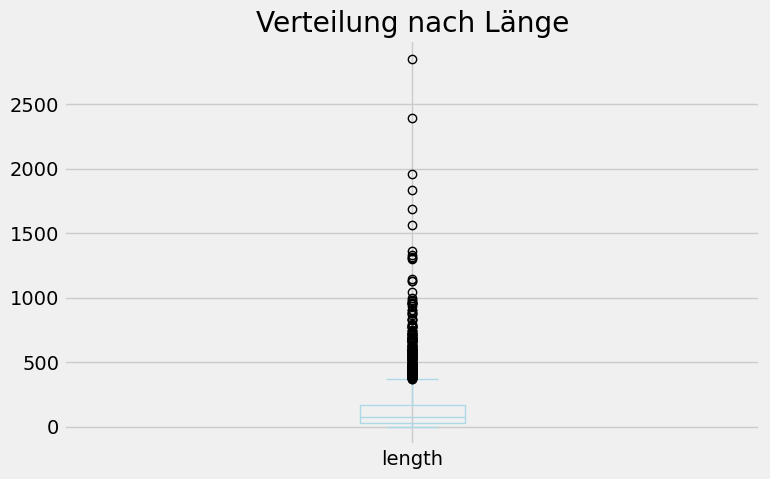

In [134]:
#veranschaulicht die Verteilung nach Länge

plt.figure(figsize=(8,5))
alexa.length.plot(color = 'lightblue',kind="box")
plt.title("Verteilung nach Länge")

Text(0.5, 1.0, 'Durschnittliche Wortlänge von positiven und negativen Bewertungen')

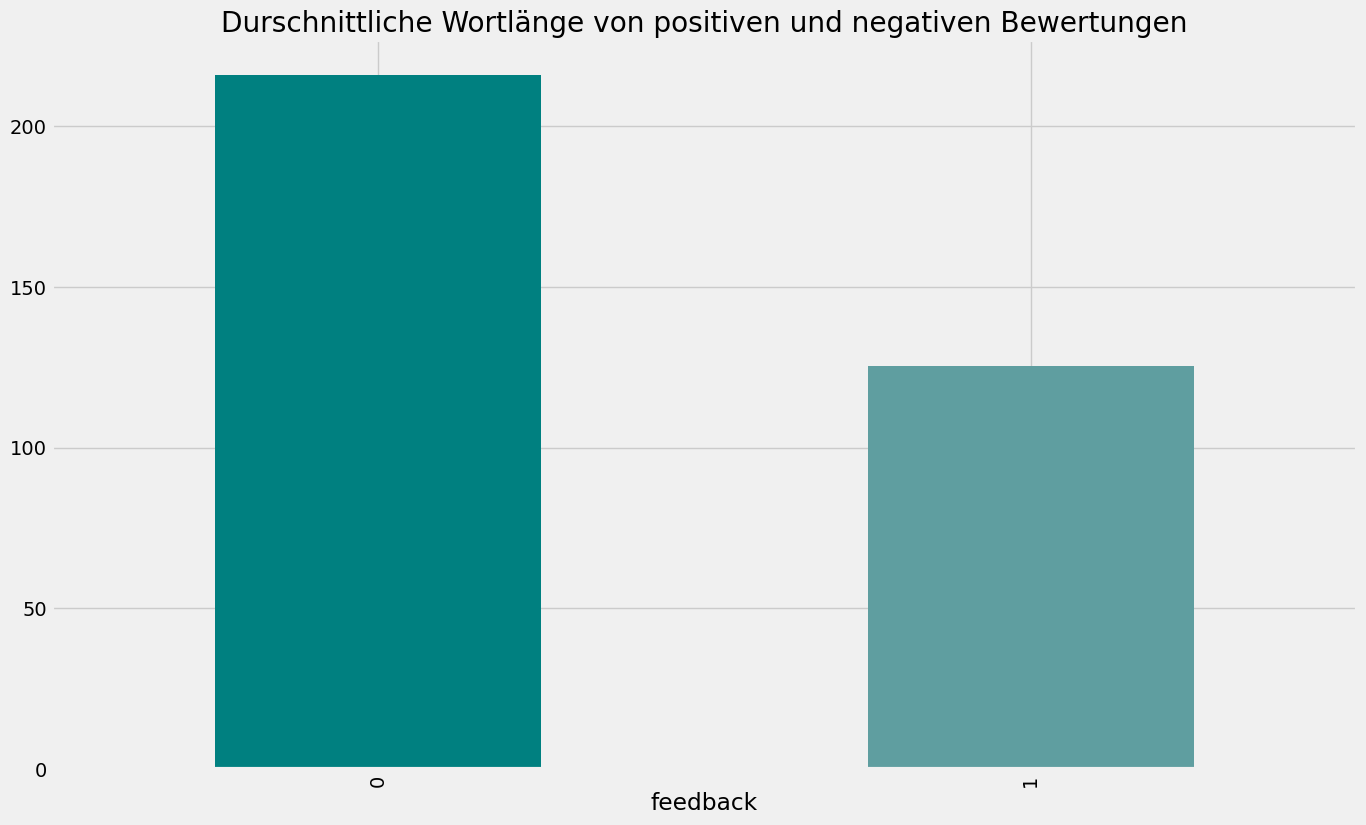

In [135]:
#veranschaulicht die Durschnittliche Wortlänge von positiven und negativen Bewertungen 

colors = ['teal', 'cadetblue']
alexa.groupby("feedback").length.mean().plot(color = colors, kind="bar")
plt.title("Durschnittliche Wortlänge von positiven und negativen Bewertungen")

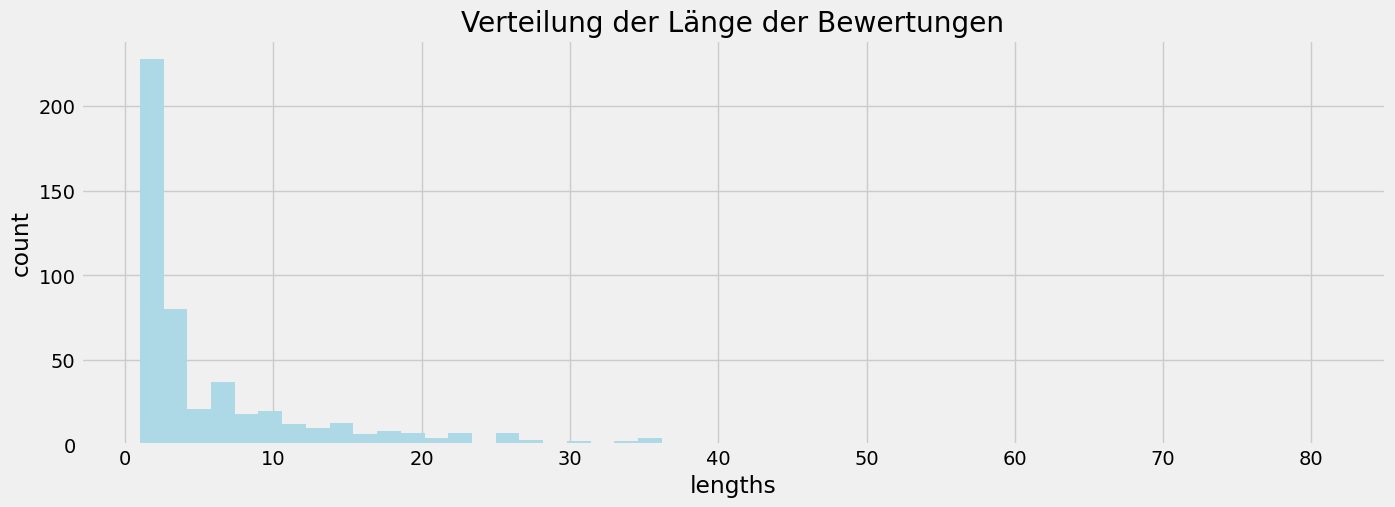

In [136]:
alexa['length'].value_counts().plot.hist(color = 'lightblue', figsize = (15, 5), bins = 50)
plt.title('Verteilung der Länge der Bewertungen')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [137]:
#zeigt ein paar Beispiele von verschiedenen Bewertungen mit verschiedenen Längen

alexa[alexa['length'] == 13]['verified_reviews'].iloc[0]

'Love my Echo!'

In [138]:
alexa[alexa['length'] == 27]['verified_reviews'].iloc[0]

'"I love it, wife hates it."'

In [139]:
alexa[alexa['length'] == 45]['verified_reviews'].iloc[0]

'Super easy set up and am loving our new Echo!'

In [140]:
alexa[alexa['length'] == 270]['verified_reviews'].iloc[0]


# ## Beschreibung der Daten entsprechend den Bewertungen

'"Love the Echo !!! I love the size, material and speaker quality. I have it hooked up to one light easily and will work on additional lights and thermostat. Next is Echo Dot for bedroom. There is a lot more to do with Echo that you think. Traffic, Weather, Trivia, etc."'

In [141]:
#zeigt die Verteilung der Sterne-Bewertungen an --> es geht hervor, dass am häufigsten 5 Sterne vergeben werden

alexa.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.979167   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.218118  0.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [142]:
#zeigt in welche Richtung (positiv/negativ) die Bewertungen gehen --> es geht hervor, dass die Bewertungen eher positiv ausfallen

alexa.feedback.value_counts()


# ## Verteilung der positiven und negativen Bewertungen
# 

feedback
1    2893
0     257
Name: count, dtype: int64

Text(0.5, 1.0, 'Prozentuale Verteilung von positiven und negativen Bewertungen')

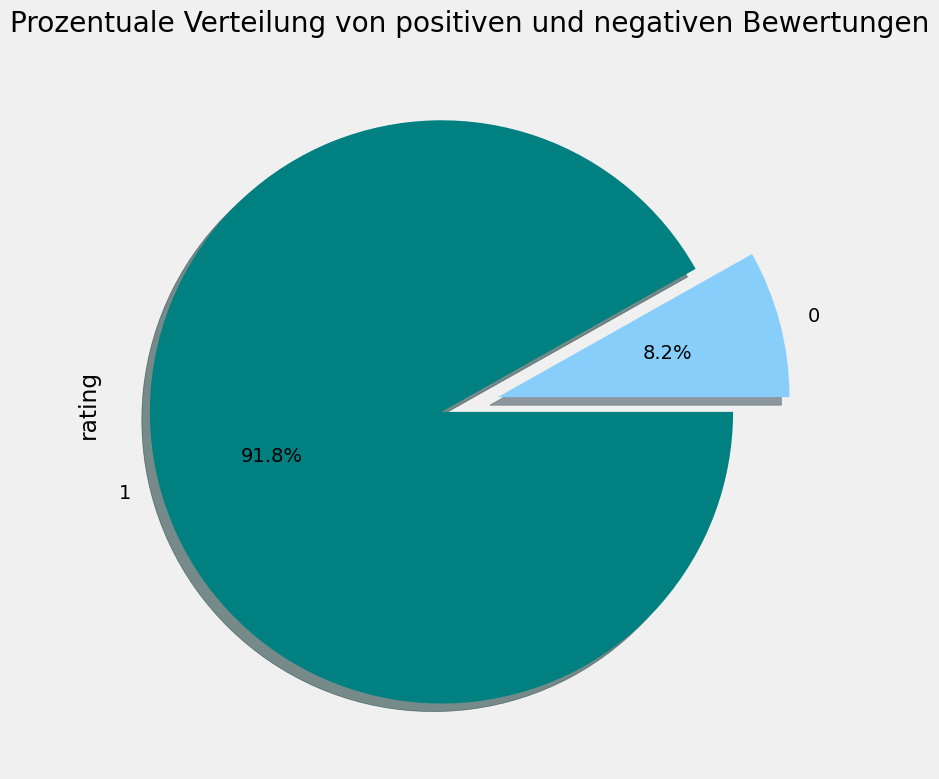

In [143]:
#zeigt diprozentuale Verteilung von positiven und negativen Bewertungen an --> es geht hervor, dass Alexa sehr gut abschneidet
 
colors = ['lightskyblue', 'teal']
alexa.groupby("feedback").rating.count().plot(colors=colors,kind="pie",shadow=True, autopct='%1.1f%%',explode=(0.1,0.1))
plt.title("Prozentuale Verteilung von positiven und negativen Bewertungen")

In [144]:
print("Percentage of negative reviews: ", (len(alexa[alexa['feedback'] == 0]) * 100)/len(alexa))
print("Percentage of Positive reviews: ", (len(alexa[alexa['feedback'] == 1]) * 100)/len(alexa))

Percentage of negative reviews:  8.158730158730158
Percentage of Positive reviews:  91.84126984126983


Text(0.5, 1.0, 'Prozentuale Verteilung nach Anzahl der Sterne')

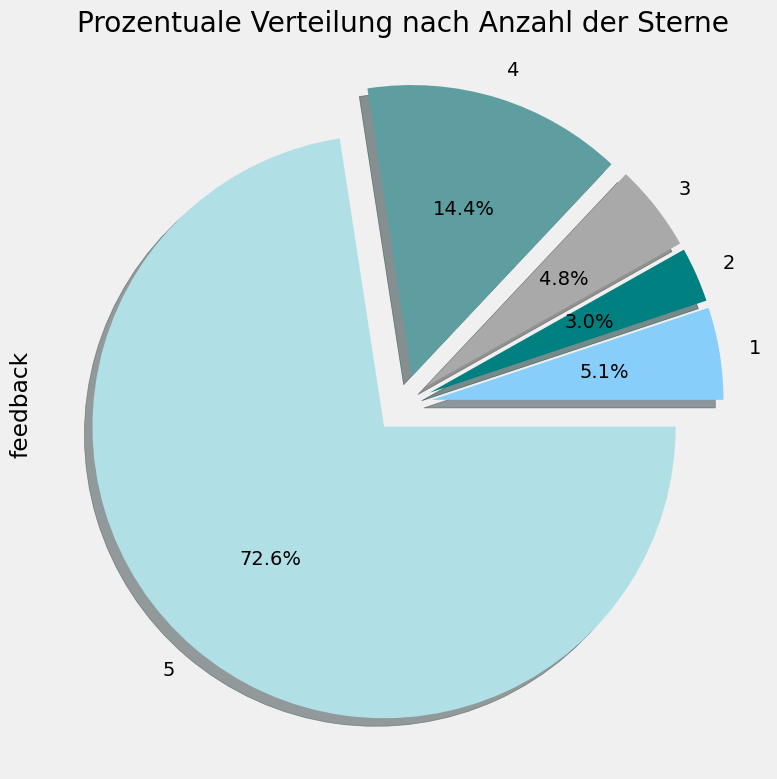

In [145]:
#visualisiert die prozentuale Verteilung nach Anzahl der Sterne

colors = ['lightskyblue', 'teal', 'darkgrey', 'cadetblue', 'powderblue']
alexa.groupby("rating").feedback.count().plot(colors=colors,kind="pie",shadow=True,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title("Prozentuale Verteilung nach Anzahl der Sterne")


# ## Rating vs. Länge
# 
# 

Text(0.5, 1.0, 'Rating vs. Länge')

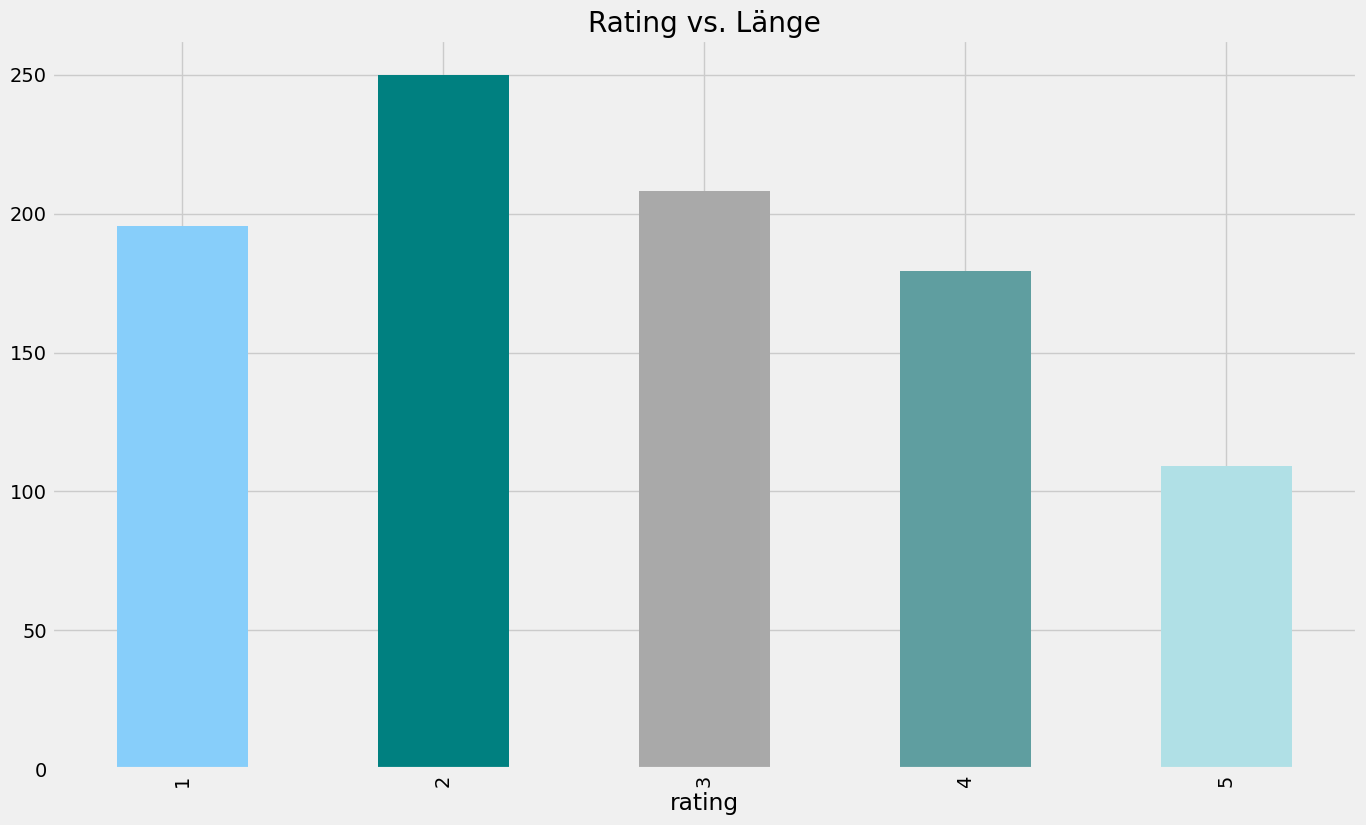

In [146]:
#veranschaulicht die Verteilung der Bewertungen nach Sternevergabe und Länge

colors = ['lightskyblue', 'teal', 'darkgrey', 'cadetblue', 'powderblue']
alexa.groupby("rating").length.mean().plot(color= colors,kind="bar")
plt.title("Rating vs. Länge")


# ## Variation vs. Rating 

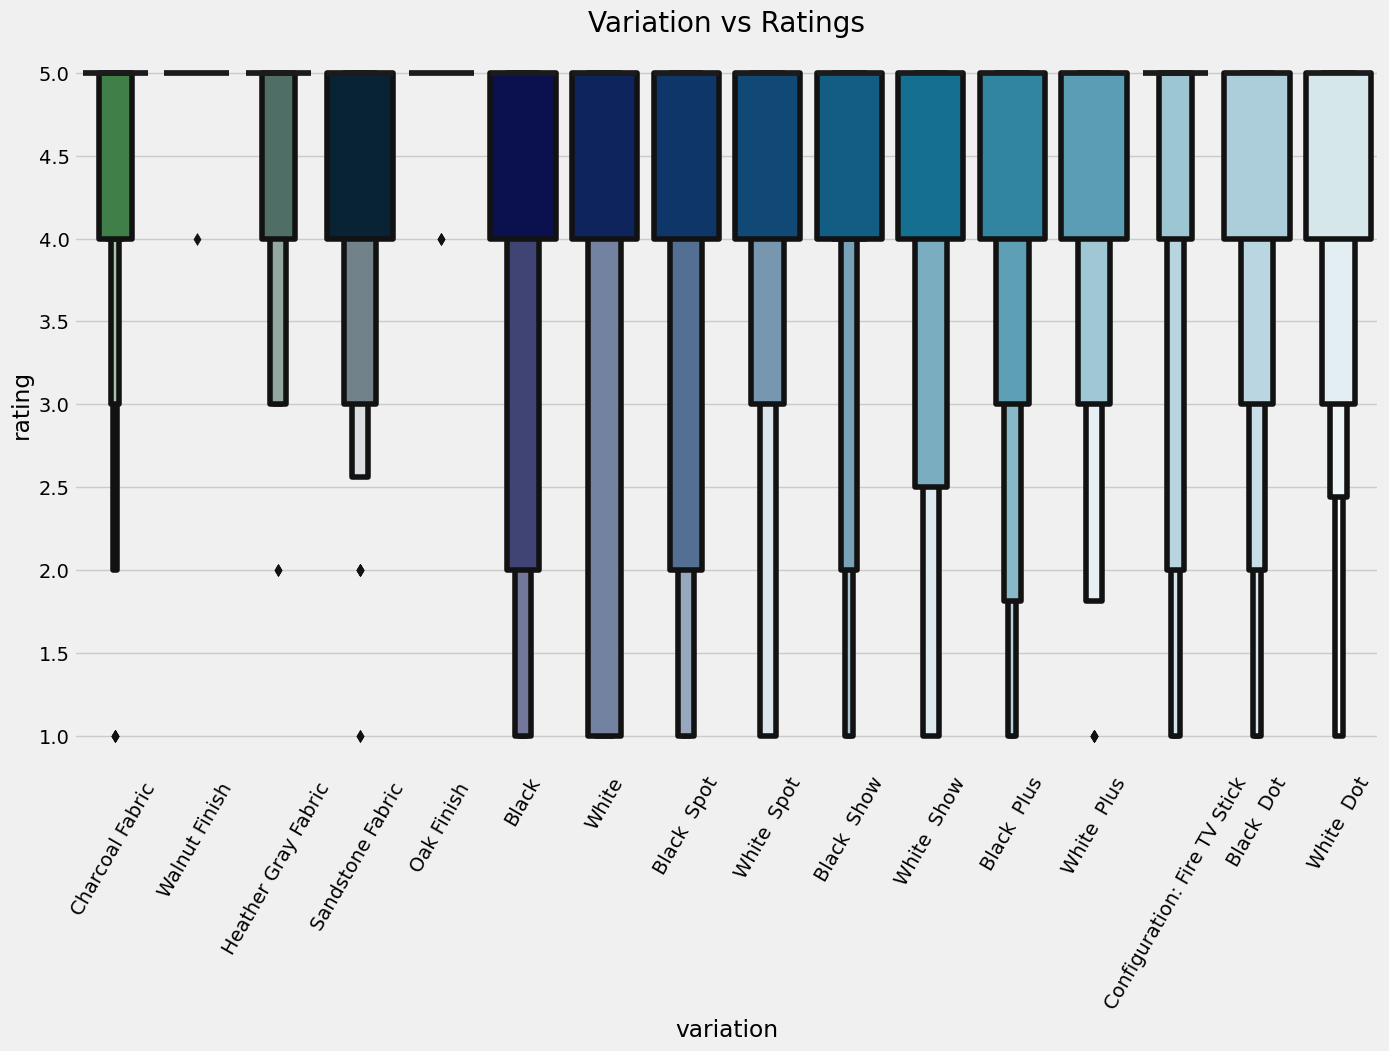

In [147]:
#Variation vs. Länge

plt.rcParams['figure.figsize'] = (15, 9)

# Use the correct parameters for sns.boxenplot
sns.boxenplot(x='variation', y='rating', data=alexa, palette='ocean')
plt.title("Variation vs Ratings")
plt.xticks(rotation=60)
plt.show()

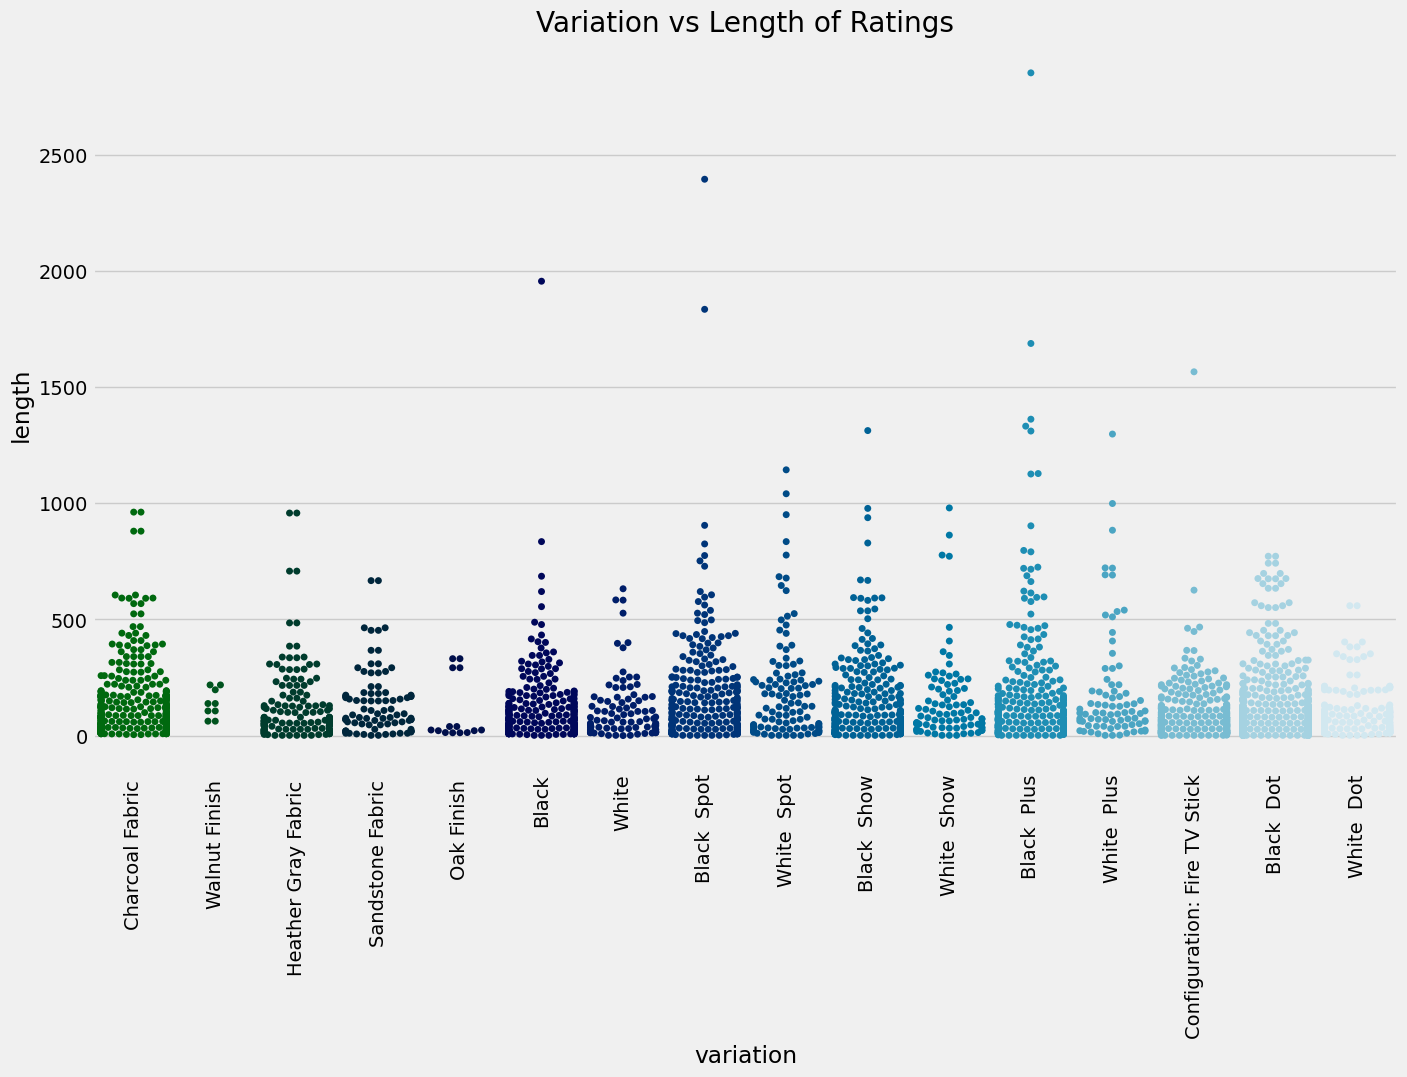

In [148]:
# Feedback vs. Länge
plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(x='variation', y='length', data=alexa, palette='ocean')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation=90)
plt.show()

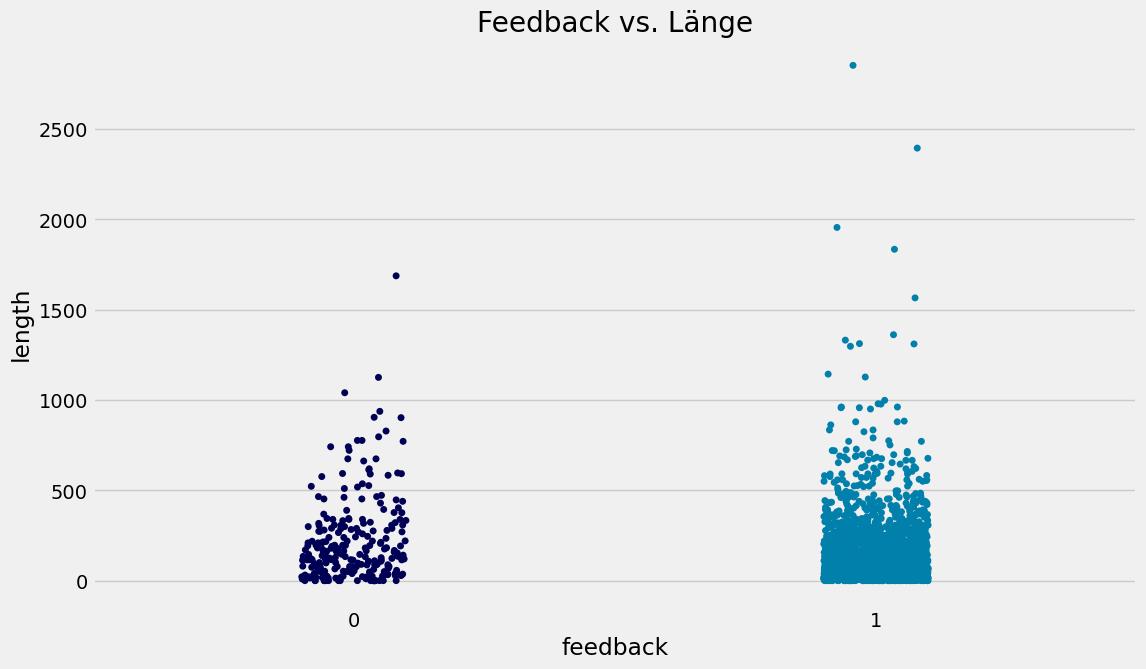

In [149]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)

sns.stripplot(x='feedback', y='length', data=alexa, palette='ocean')
plt.title("Feedback vs. Länge")
plt.show()

In [150]:
sum(alexa['feedback'] == 1)

2893

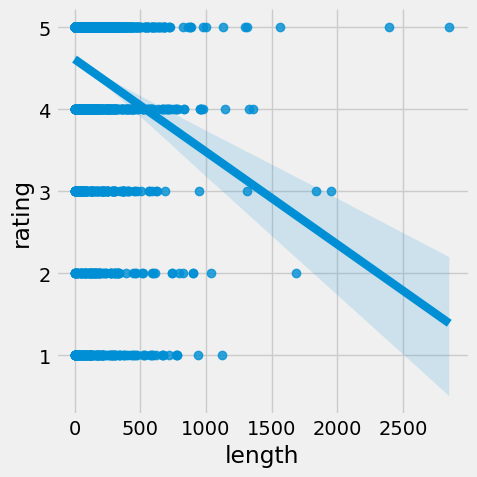

In [151]:
sns.lmplot(x='length',y='rating',data=alexa)

In [152]:
# CountVectorizer zeigt die am häufigsten verwendeten Wörter

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(alexa.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color=color)
plt.title("Die meist verwendeten Wörter - Top 20")
plt.show()

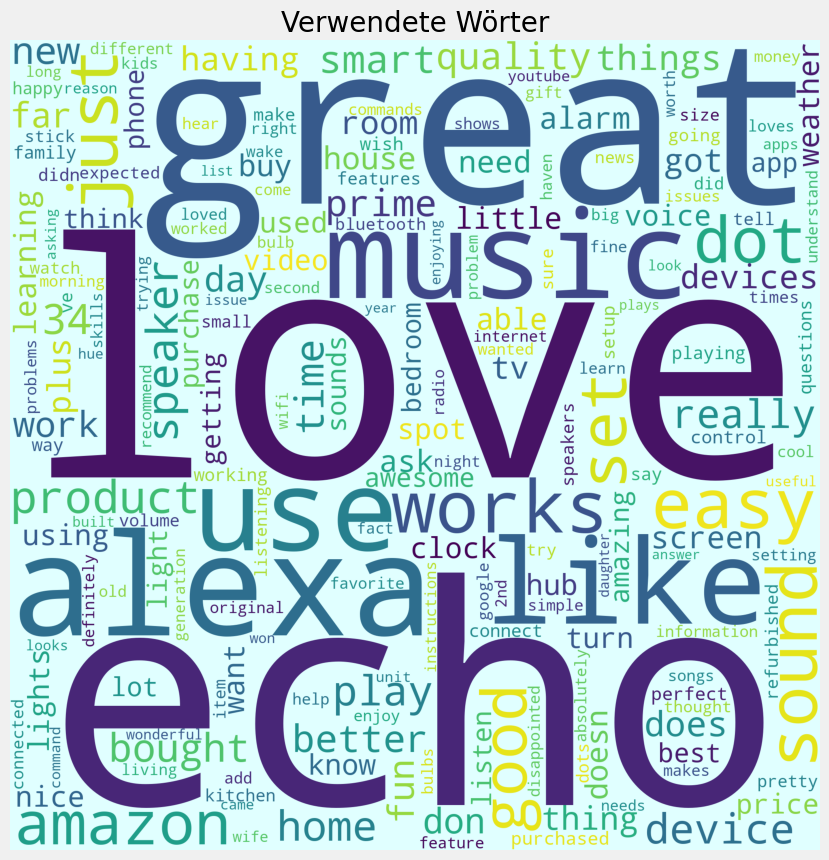

In [153]:
#Visualisiert die meist verwendeten Wörter

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Verwendete Wörter", fontsize = 20)
plt.show()

In [154]:
#visualisiert positive Bewertungen
good=alexa[alexa.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)
cv=WordCloud().generate(good)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

In [155]:
alexa

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     "Sometimes while playing a game, you can answe...         1     197  
3     "I have had a lot of fun with this thing. My 4...         1     174  
4                                                 Music         1       5  
...                                                 ...       ...     ...  
3145  "Perfect for kids, adults and everyone in betw...         1      52  
3146  "Listening to music, searching locations, chec...         1     137  
3147  "I do love these things, i have them running m...         1     443  
3148  "Only complaint I have is that the sound quali...         1     382  
3149                                               Good         1       4  

[3150 rows x 6 columns]

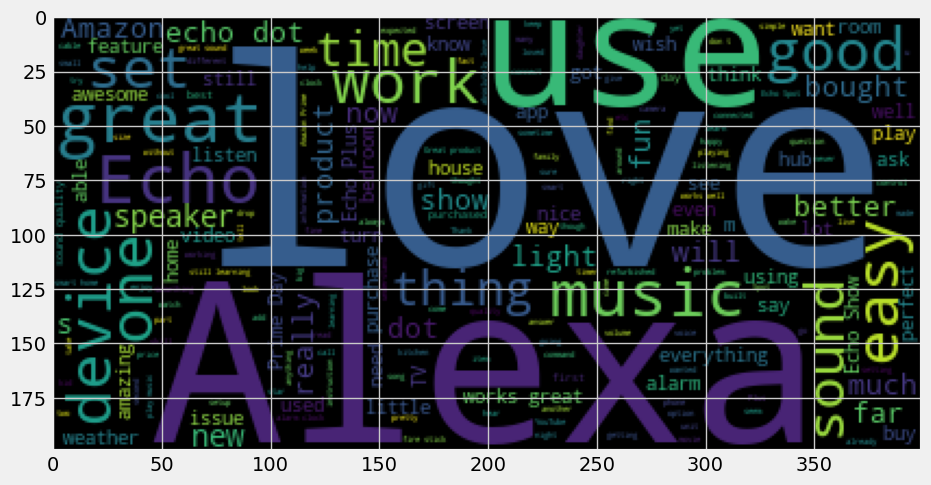

In [156]:
#visualisiert positive Bewertungen
good=alexa[alexa.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)
cv=WordCloud().generate(good)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)

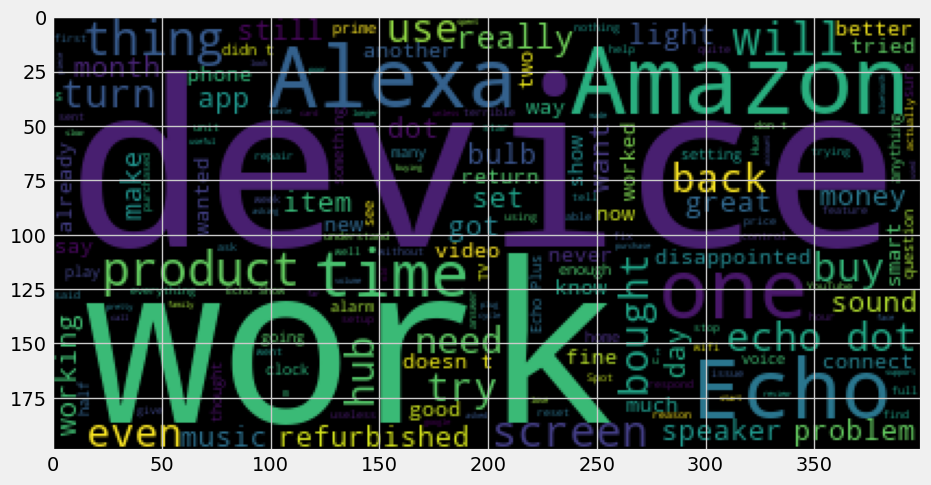

In [157]:
#visualisiert negative Bewertunegen
bad=alexa[alexa.feedback==0].verified_reviews.unique().tolist()
bad=" ".join(bad)
cv=WordCloud().generate(bad)
cv
plt.figure(figsize=(10,8))
plt.imshow(cv)


# # Meachine Learning Model Teil

In [158]:
#Download Stopword Resources
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Print the first 10 stopwords as an example
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [160]:
corpus = []
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
for i in range(0, len(alexa)):
    review = re.sub('[^a-zA-Z]', ' ', alexa['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)

In [161]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad not see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons not seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come not get around fast like enjoy littl b

In [162]:
counter = CountVectorizer(max_features = 2500)
X = counter.fit_transform(corpus).toarray()
y = alexa.iloc[:, 4].values

In [163]:
counter.get_feature_names_out()

array(['abay', 'abc', 'abd', ..., 'zero', 'zigbe', 'zonk'], dtype=object)

In [164]:
sum(sum(X == 4))

127

In [165]:
alexa[alexa['feedback']==0].head(20)

rating       date             variation  \
46        2  30-Jul-18      Charcoal Fabric    
111       2  30-Jul-18      Charcoal Fabric    
141       1  30-Jul-18      Charcoal Fabric    
162       1  30-Jul-18     Sandstone Fabric    
176       2  30-Jul-18  Heather Gray Fabric    
187       2  29-Jul-18      Charcoal Fabric    
205       2  29-Jul-18     Sandstone Fabric    
233       2  29-Jul-18     Sandstone Fabric    
299       2  29-Jul-18      Charcoal Fabric    
341       1  28-Jul-18      Charcoal Fabric    
350       1  31-Jul-18                 Black   
361       1  29-Jul-18                 Black   
368       1  28-Jul-18                 Black   
369       1  28-Jul-18                 Black   
373       1  27-Jul-18                 Black   
374       1  26-Jul-18                 Black   
376       2  26-Jul-18                 Black   
381       1  25-Jul-18                 White   
382       2  25-Jul-18                 Black   
388       1  24-Jul-18                 Black   

                                      verified_reviews  feedback  length  
46   "It's like Siri, in fact, Siri answers more ac...         0     165  
111  Sound is terrible if u want good music too get...         0      53  
141                                 Not much features.         0      18  
162  "Stopped working after 2 weeks ,didn't follow ...         0      89  
176                               Sad joke. Worthless.         0      20  
187  "Really disappointed Alexa has to be plug-in t...         0     340  
205  It's got great sound and bass but it doesn't w...         0     114  
233  "I am not super impressed with Alexa. When my ...         0     309  
299  Too difficult to set up.  It keeps timing out ...         0      79  
341                             Alexa hardly came on..         0      22  
350  Item no longer works after just 5 months of us...         0     109  
361  This thing barely works. You have to select 3r...         0     154  
368  I returned 2 Echo Dots & am only getting refun...         0     181  
369                                        not working         0      11  
373          I'm an Echo fan but this one did not work         0      41  
374                                                            0       1  
376  Doesn't always respond when spoken to with pro...         0     159  
381  It worked for a month or so then it stopped. I...         0     130  
382                        Poor quality. Gave it away.         0      27  
388  "Never could get it to work. A techie friend l...         0     243

In [166]:
#Daten werden in Test und Train Daten aufgeteilt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_preddata = classifier.predict(X_test)

In [167]:
print("The F1 score is: ", f1_score(y_test, y_preddata, average="macro")*100)
print("The precision score is: ", precision_score(y_test, y_preddata, average="macro")*(100))
print("The recall score is: ", recall_score(y_test, y_preddata, average="macro")*100) 
print("The accuracy score is: ", accuracy_score(y_test, y_preddata)*100)


# ## Decision tree (2. Variante)
# 
# 

The F1 score is:  76.10344827586206
The precision score is:  78.20875521143537
The recall score is:  74.36342592592592
The accuracy score is:  93.01587301587301


In [168]:
dt_clf = DecisionTreeClassifier(class_weight='balanced')

In [169]:
dt_clf.fit(X_train, y_train)               # Model fitting auf X_train,y_train
y_pred = dt_clf.predict(X_test)

In [170]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 31  23]
 [ 47 529]]


In [171]:
cr = classification_report(y_test ,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.57      0.47        54
           1       0.96      0.92      0.94       576

    accuracy                           0.89       630
   macro avg       0.68      0.75      0.70       630
weighted avg       0.91      0.89      0.90       630



In [172]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8888888888888888
